<a href="https://colab.research.google.com/github/MALIKMUHAMMADWAQAR/Graphics/blob/main/stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q yfinance
!pip install pandas-datareader
!pip install keras 
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Importing DataReader to get data from the yahoo libaray yf and put into a dataframe
from pandas_datareader.data import DataReader
import yfinance as yf

# datetime module to work with date and time
from datetime import datetime

In [ ]:
# We want to access the stocks of Tech Companies i.e. Apple,Google, Microsoft and Amazon 
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

#Stating the Time period of data 
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
print(AAPL)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-06-14  127.820000  130.539993  127.070000  130.479996  129.738770   
2021-06-15  129.940002  130.600006  129.389999  129.639999  128.903534   
2021-06-16  130.369995  130.889999  128.460007  130.149994  129.410645   
2021-06-17  129.800003  132.550003  129.649994  131.789993  131.041321   
2021-06-18  130.710007  131.509995  130.240005  130.460007  129.718887   
...                ...         ...         ...         ...         ...   
2022-06-06  147.029999  148.570007  144.899994  146.139999  146.139999   
2022-06-07  144.350006  149.000000  144.100006  148.710007

In [ ]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Adding feauture fo company_name to the dataframes and then joining the dataframes
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
#print(df.head(5))
print(df.shape)


(1008, 7)


In [ ]:
#checking the number of entries for each company
for company in company_name:
    print("{} has {} entries".format(company,df[df.company_name == company].shape[0]))    

APPLE has 252 entries
GOOGLE has 252 entries
MICROSOFT has 252 entries
AMAZON has 252 entries


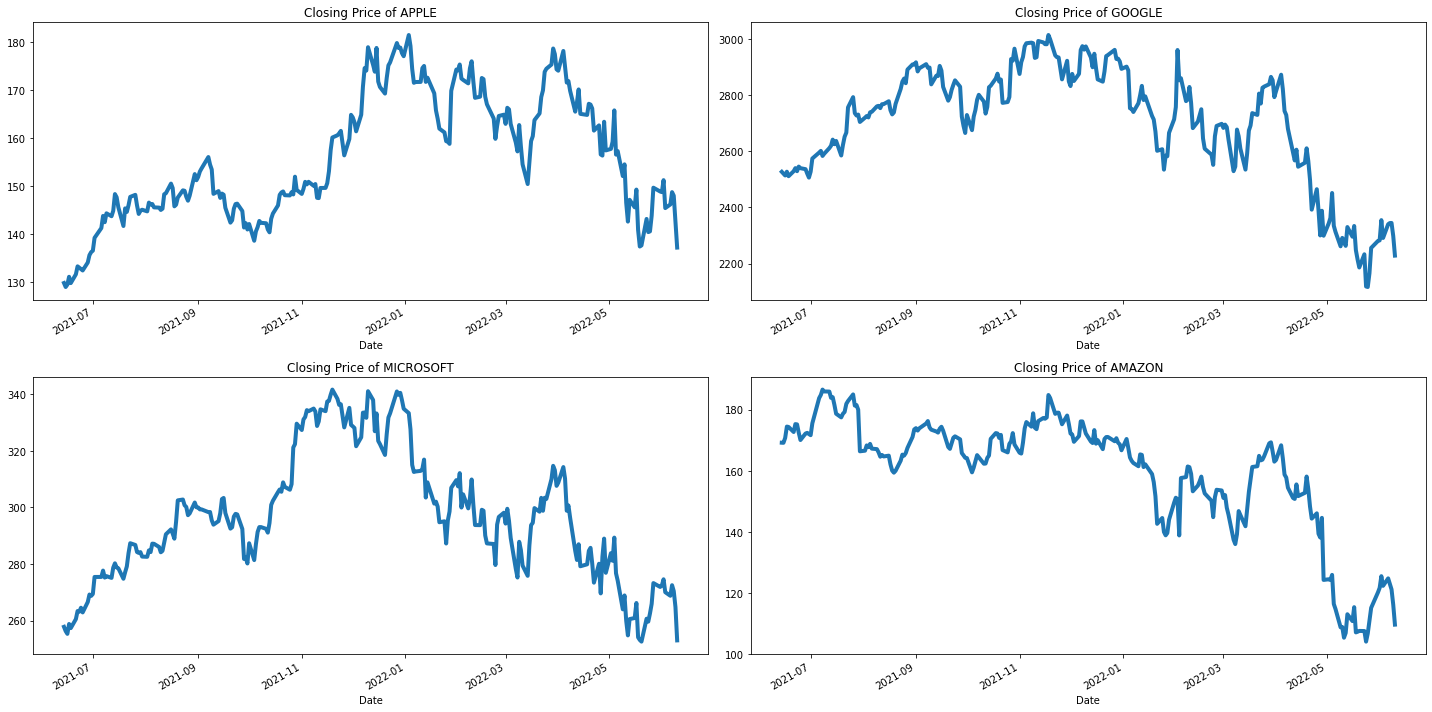

In [ ]:
#Making separate dataframes
apple_df = df[df.company_name == "APPLE"]
google_df= df[df.company_name == "GOOGLE"]
microsoft_df = df[df.company_name == "MICROSOFT"]
amazon_df= df[df.company_name == "AMAZON"]


fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20,10))
apple_df['Adj Close'].plot(ax = axes[0,0],title = "Closing Price of APPLE", linewidth = 4)
google_df['Adj Close'].plot(ax = axes[0,1],title = "Closing Price of GOOGLE", linewidth = 4)
microsoft_df['Adj Close'].plot(ax = axes[1,0],title = "Closing Price of MICROSOFT", linewidth = 4)
amazon_df['Adj Close'].plot(ax = axes[1,1],title = "Closing Price of AMAZON", linewidth = 4)
#Fits the figure in its place
plt.tight_layout()

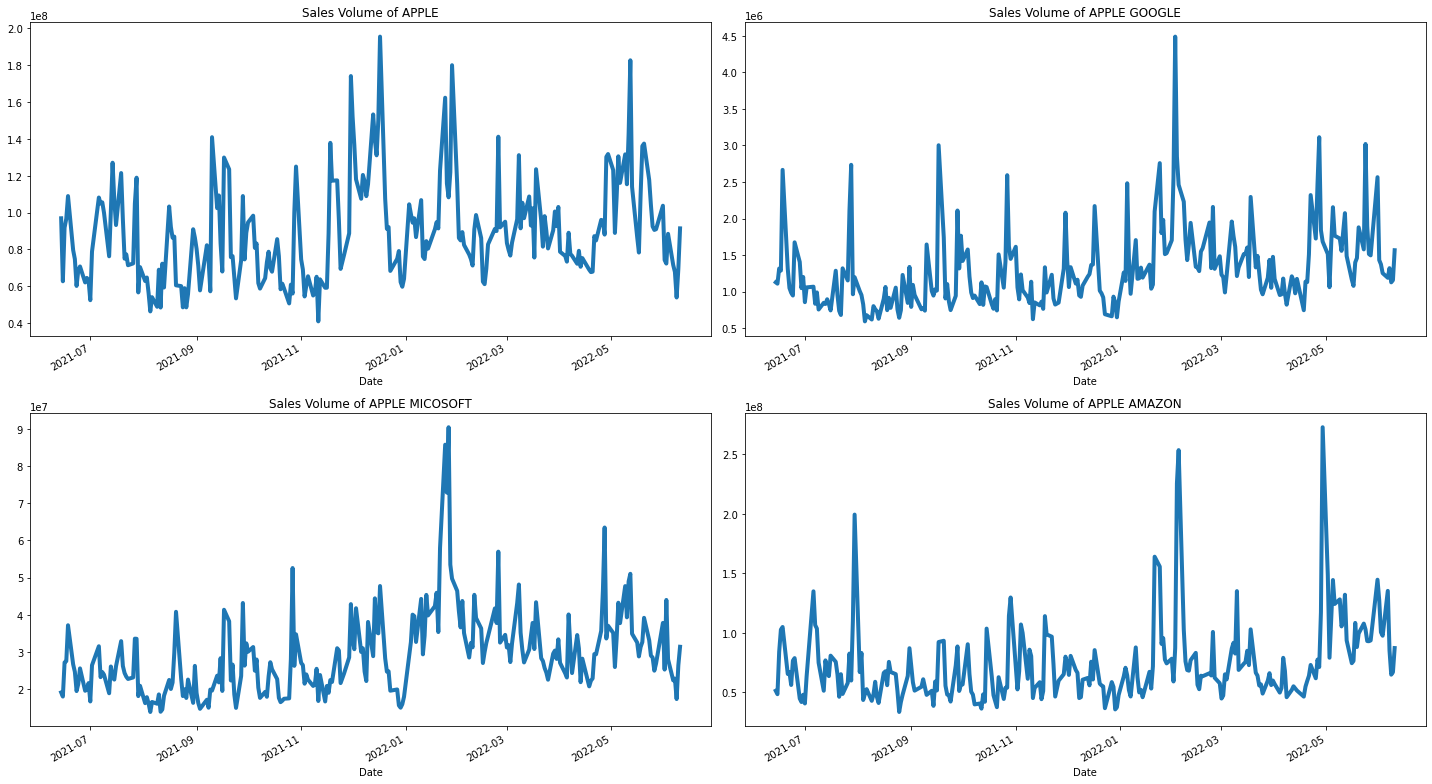

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20,11))
apple_df['Volume'].plot(ax = axes[0,0],title = "Sales Volume of APPLE", linewidth = 4)
google_df['Volume'].plot(ax = axes[0,1],title = "Sales Volume of APPLE GOOGLE", linewidth = 4)
microsoft_df['Volume'].plot(ax = axes[1,0],title = "Sales Volume of APPLE MICOSOFT", linewidth = 4)
amazon_df['Volume'].plot(ax = axes[1,1],title = "Sales Volume of APPLE AMAZON", linewidth = 4)
#Fits the figure in its place
plt.tight_layout()

In [ ]:
moving_average = [10, 20, 50]
dataframes = [apple_df,google_df,microsoft_df,amazon_df]

for ma in moving_average:
    for company in dataframes:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

C:\Users\CBNU\AppData\Local\Temp/ipykernel_9800/1846622671.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company[column_name] = company['Adj Close'].rolling(ma).mean()


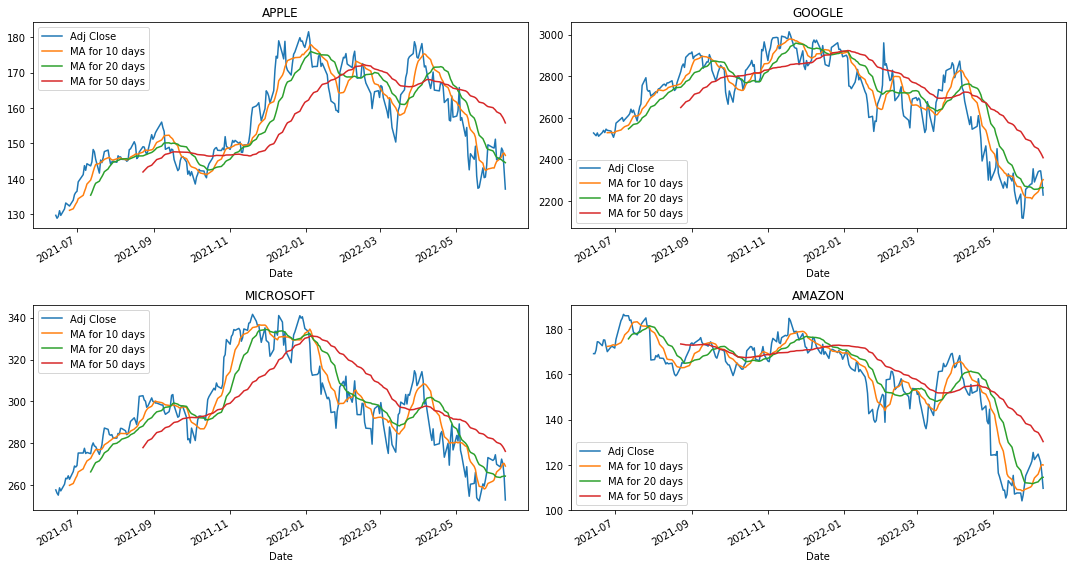

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

apple_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

google_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

microsoft_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

amazon_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

C:\Users\CBNU\AppData\Local\Temp/ipykernel_9800/3029682332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Daily Return'] = company['Adj Close'].pct_change()


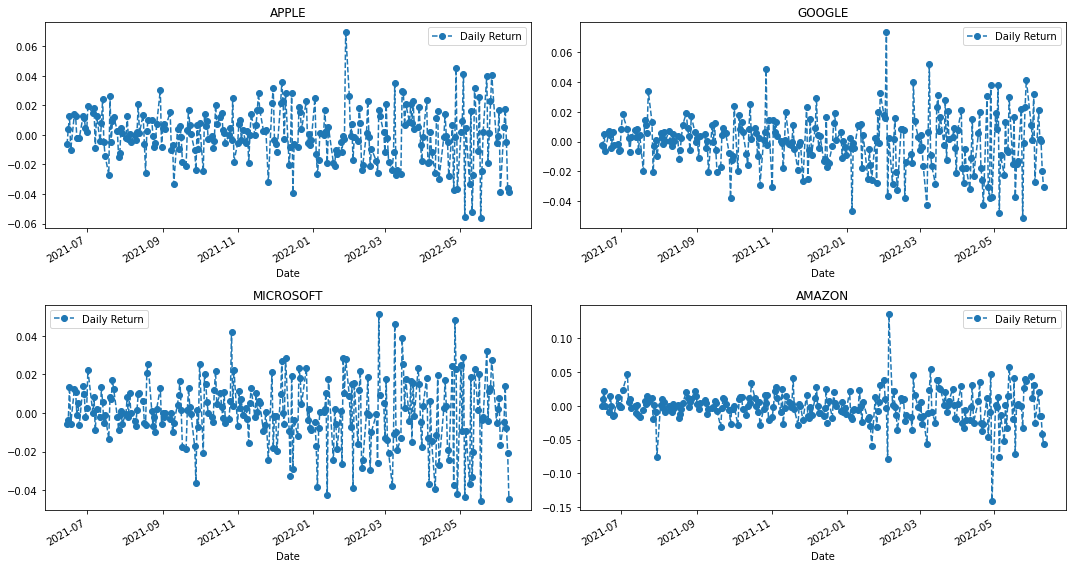

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in dataframes:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

apple_df['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

google_df['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

microsoft_df['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

amazon_df['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

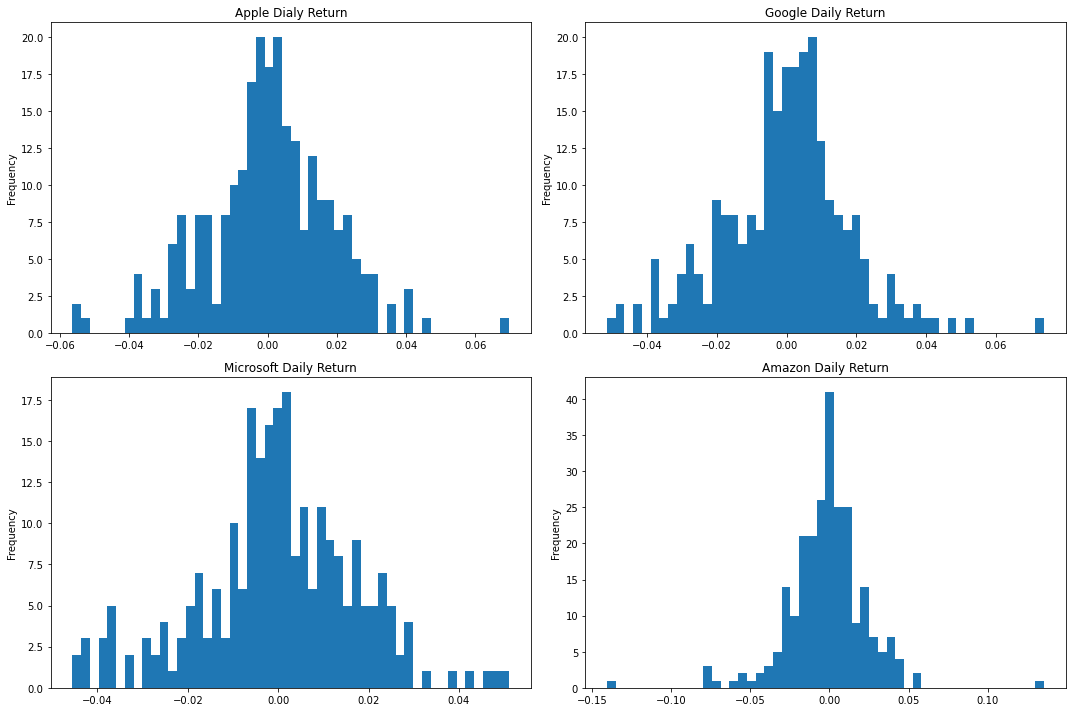

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15,10))

apple_df['Daily Return'].plot.hist(ax = axes[0,0],title = "Apple Dialy Return",bins= 50)
google_df['Daily Return'].plot.hist(ax = axes[0,1],title = "Google Daily Return",bins= 50)
microsoft_df['Daily Return'].plot.hist(ax = axes[1,0],title = "Microsoft Daily Return",bins= 50)
amazon_df['Daily Return'].plot.hist(ax = axes[1,1],title = "Amazon Daily Return",bins= 50)
fig.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-14,129.738770,2527.040039,257.785065,169.193497
2021-06-15,128.903534,2520.659912,256.267426,169.156494
2021-06-16,129.410660,2513.929932,255.295364,170.762497
2021-06-17,131.041321,2527.419922,258.786835,174.462006
2021-06-18,129.718903,2511.350098,257.328766,174.345001


In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,-0.006438,-0.002525,-0.005887,-0.000219
2021-06-16,0.003934,-0.002670,-0.003793,0.009494
2021-06-17,0.012601,0.005366,0.013676,0.021665
2021-06-18,-0.010092,-0.006358,-0.005634,-0.000671


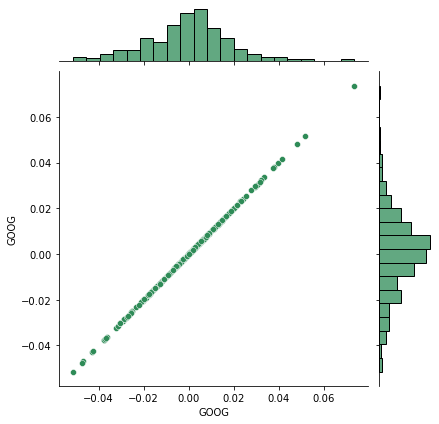

In [ ]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

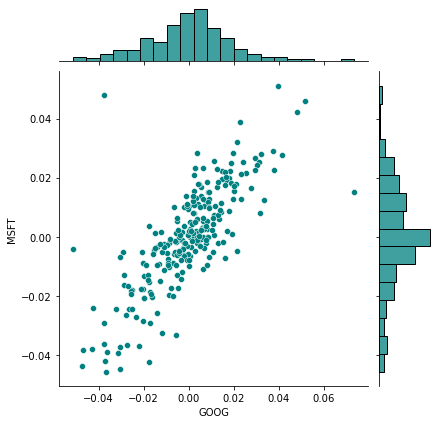

In [ ]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter', color='teal')

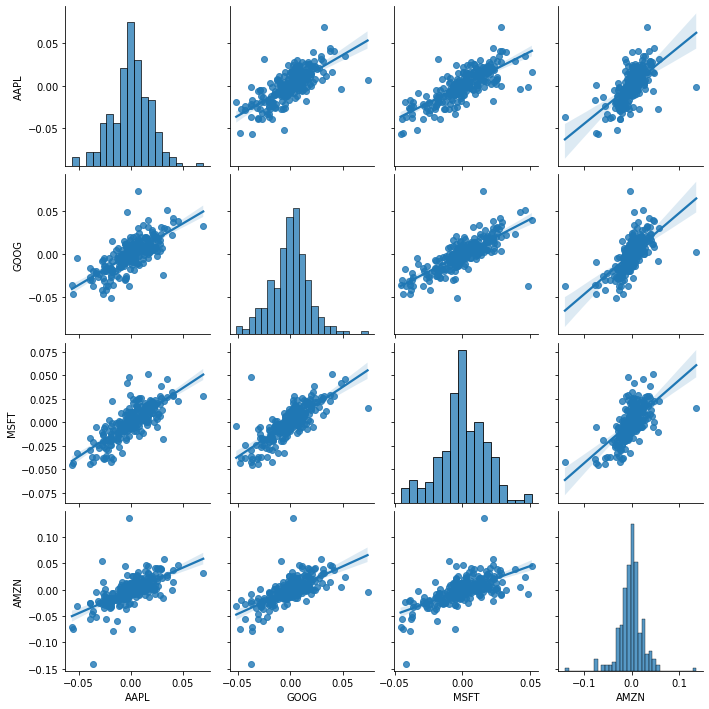

In [ ]:
sns.pairplot(tech_rets, kind='reg')


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

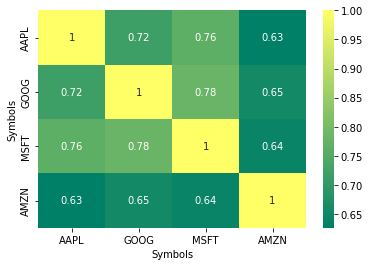

In [ ]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

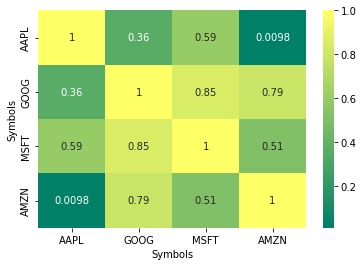

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

# Predict the closing stock price for Microsoft

In [ ]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2010-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434925
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546382
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346
...,...,...,...,...,...,...
2022-06-06,148.570007,144.899994,147.029999,146.139999,71598400.0,146.139999
2022-06-07,149.000000,144.100006,144.350006,148.710007,67808200.0,148.710007
2022-06-08,149.869995,147.460007,148.580002,147.960007,53950200.0,147.960007


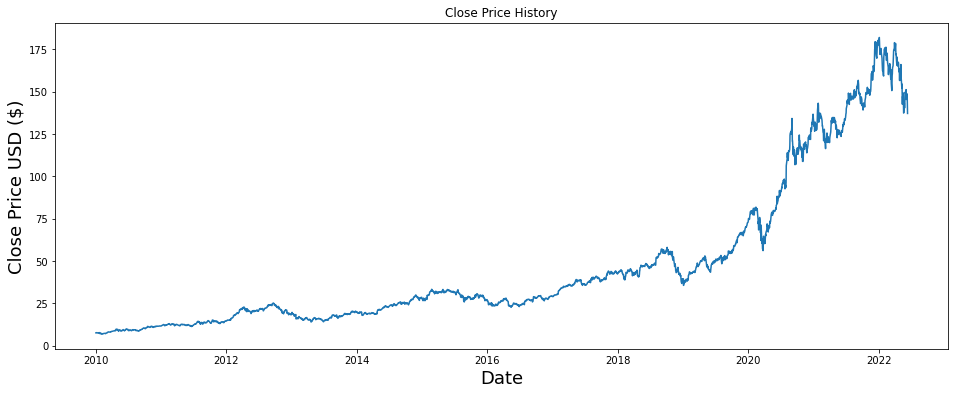

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df[['Close']]
# Convert the dataframe to a numpy array
dataset = np.array(data)
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

2507

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00380895],
       [0.00447776],
       [0.00455321],
       ...,
       [0.80559646],
       [0.77522263],
       [0.74376411]])

In [ ]:
# # Create the training data set 
# # Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
#         print(y_train)
        
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([3.80895151e-03, 4.47776362e-03, 4.55321042e-03, 3.85789270e-03,
       3.77836496e-03, 4.06383392e-03, 3.68253530e-03, 3.19519517e-03,
       3.79263868e-03, 3.54387631e-03, 2.83020666e-03, 4.68778577e-03,
       4.01286179e-03, 3.26656105e-03, 1.16225866e-03, 2.24703686e-03,
       2.83224576e-03, 3.22782354e-03, 1.47627233e-03, 2.03638039e-06,
       5.46463221e-04, 7.76876395e-04, 1.46403771e-03, 0.00000000e+00,
       6.95312283e-04, 4.22080672e-04, 8.44166789e-04, 6.25985509e-04,
       1.34985068e-03, 1.69853181e-03, 2.31432725e-03, 2.14100896e-03,
       2.21848942e-03, 1.96156791e-03, 1.70668550e-03, 1.02156329e-03,
       1.75562669e-03, 2.02885830e-03, 2.56308963e-03, 3.45416123e-03,
       3.42561379e-03, 3.52348256e-03, 3.80487330e-03, 5.48505863e-03,
       5.51156697e-03, 6.31495443e-03, 6.68606025e-03, 6.82063559e-03,
       7.04493690e-03, 6.48215813e-03, 6.60653796e-03, 6.53925029e-03,
       6.64732002e-03, 6.15794623e-03, 6.66771105e-03, 7.40380811e-03,
     

# RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2447/2447 [==============================] - 43s 17ms/step - loss: 1.6035e-04


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

20/20 [==============================] - 1s 17ms/step


8.648568538102737

C:\Users\CBNU\AppData\Local\Temp/ipykernel_9800/3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


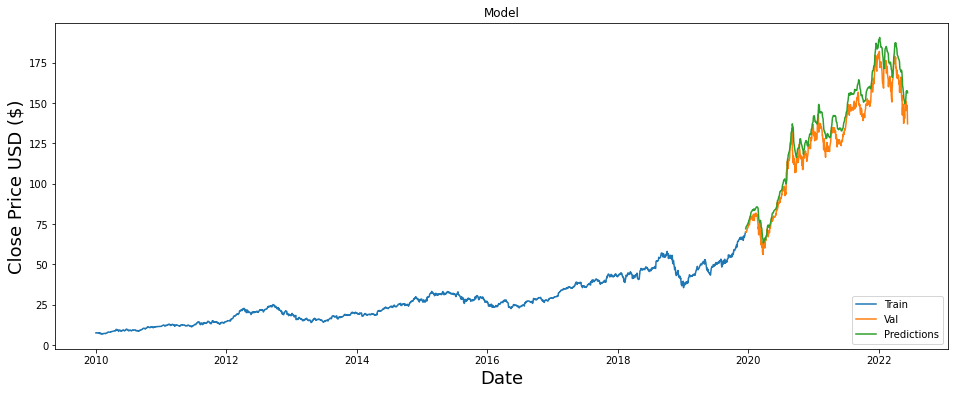

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()